In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
# Load the saved model from a file
lgreg = joblib.load('best_model.pkl')

In [3]:
# Define a function to classify a forest image and show the label and probability in the photo
def classify_image(image_path):
    # Load the image and preprocess it
    image_org = cv2.imread(image_path)
    image_resize = cv2.resize(image_org, (100, 100))
    image = image_resize / 255.0
    image = image.reshape(1, -1)

    # Make a prediction on the image using the saved model
    y_proba = lgreg.predict_proba(image)
    y_pred = lgreg.predict(image)

    # Show the image and label
    label = 'fire' if y_pred[0] == 1 else 'no_fire'
    if label == 'no_fire':
      prob = 100-(round(y_proba[0][1], 3)*100)
    else:
      prob = round(y_proba[0][1], 3)*100
    color = 'red' if y_pred[0] == 1 else 'green'

    # Display the image and label
    plt.imshow(image_org)
    plt.title(f"{label} ({prob})", color=color)
    plt.axis('off')
    plt.show()

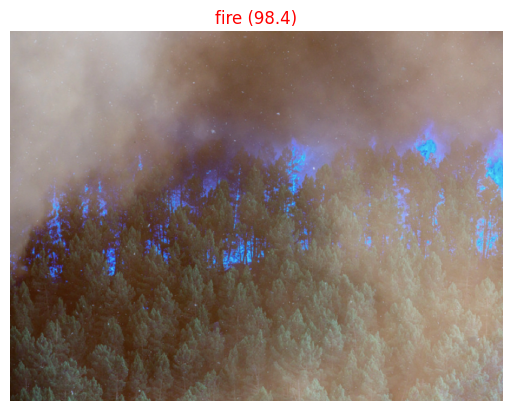

In [5]:
# Test the classifier on some forest images
classify_image('1.jpg')

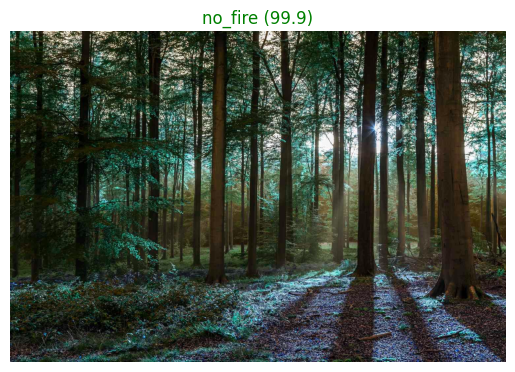

In [6]:
# Test the classifier on some forest images
classify_image('2.jpg')